#### Université d’Orléans - 2024/2025  <span style="float: right;"> Algorithmique et Programmation 2</span>     

<h1 style="text-align: center">TP8 : Tables de hachage</h1>

L’objectif de ce TP est de fournir plusieurs implémentations pour le type de données abstrait _tableau associatif_. 

<div class="alert alert-info">

Il est bien sûr possible d’utiliser directement des `dict()` en `Python`. Mais tous les langages de programmation ne fournissent pas d’implémentation de ces structures types de données, il est donc important de les comprendre et d’être capables de les coder.
    
</div>

On souhaite en particulier que chaque implémentation puisse permettre la syntaxe suivante : 

```python
mon_dictionnaire = MonDictionnaireImplemente()

mon_dictionnaire.inserer("macle", "mavaleur")
mon_dictionnaire.inserer("monautrecle", "monautrevaleur")

if mon_dictionnaire.rechercher("macle"):
    print("Clé présente")
else:
    print("Clé absente")
```

<div class="alert alert-warning">

Ces méthodes sont indépendantes de la manière dont est implémenté le tableau associatif et existeront dans tous les cas. Elles sont fournies par ce qu’on appelle communément une _interface_ : nous avons déjà étudié des concepts de ce genre avec les `File` et les `Pile`, notamment. Pour les tables de hachage cette interface peut par exemple ête définie par la classe suivante : 

</div>

In [47]:
from abc import ABC, abstractmethod

# ABC signifie que la classe MonDictionnaire est abstraite : 
# il ne sera pas possible de créer d’objets de cette classe. 
# Et c’est normal : un dictionnaire peut être implémenté avec un tableau, 
# une liste chaînée, un arbre binaire de recherche… 
# Et l’implémentation est pour l’instant abstraite !
class MonDictionnaireImplemente(ABC):
    @abstractmethod
    def rechercher(self, cle):
        pass

    @abstractmethod
    def inserer(self, cle, valeur):
        pass

    @abstractmethod
    def supprimer(self, cle):
        pass

<div class="alert alert-warning">

Essayons de créer un dictionnaire pour voir ce que cela donne. 

</div>

In [2]:
mon_dictionnaire = MonDictionnaireImplemente()

TypeError: Can't instantiate abstract class MonDictionnaireImplemente with abstract methods inserer, rechercher, supprimer

L’erreur indiquée signifie que `Python` ne peut pas créer d’objet de la classe MonDictionnaire car aucune implémentation des méthodes listées n’est définie. Nous allons donc fournir ces implémentations dans la suite.

## L’adressage direct

Nous allons commencer par la version la plus simple : l’adressage direct. Dans ce cas, la table possède autant d’alvéoles que de clés possibles dans l’univers, et la fonction de hachage associe une alvéole différente à chaque clé possible. 

<div class="alert alert-info">

1. Donner une implémentation de la classe suivante, respectant le concept de l’adressage direct. Toutes les méthodes déclarées comme `@abstractmethod` **doivent** être implémentées.

</div> 

In [50]:
class AdressageDirect(MonDictionnaireImplemente):
    
    def __init__(self , hachage = hash , alveoles = 3):
        
        self.__table = [ None for _ in range(alveoles)]
        self.__alveoles = alveoles 
        self.__elements = 0
        self.__hachage = hachage
        
    def __str__(self):
        return str(self.__table)
    
    def __get_cles(self):
        return [e[0] for e in self.__table if e is not None]
        
    def rechercher(self, cle):
        try:
            self.__get_cles().index(cle)
            return True 
        except ValueError:
            return False
        
                                        #alveoles = groupement des elem du tuple
                                        #elements = element clé dans le tuple
                                        #voir photo
                                        #del : dans les structures types tableau pour supprimer

    def inserer(self, cle, valeur):
        h = self.__elements
        if h >= self.__alveoles :
            self.__table.extend([None])
            self.__alveoles += 1 
        self.__table[h] = (cle,valeur)
        self.__elements += 1 

    def supprimer(self, cle):
        h = self.__elements -1
        if self.__table[h]is not None :
            del self.__table[h]
            self.__elements -= 1

<div class="alert alert-info">

Voici un exemple de programme principal utilisant cette classe.

</div>

In [51]:
mon_dictionnaire = AdressageDirect()

mon_dictionnaire.inserer("macle", "mavaleur")
mon_dictionnaire.inserer("monautrecle", "monautrevaleur")
mon_dictionnaire.inserer("toto", "tata")
mon_dictionnaire.inserer("titi", "tata")

print (mon_dictionnaire)

mon_dictionnaire.supprimer("titi")

print (mon_dictionnaire)


if mon_dictionnaire.rechercher("macle"):
    print("Clé présente")
else:
    print("Clé absente")
    



[('macle', 'mavaleur'), ('monautrecle', 'monautrevaleur'), ('toto', 'tata'), ('titi', 'tata')]
[('macle', 'mavaleur'), ('monautrecle', 'monautrevaleur'), ('toto', 'tata')]
Clé présente


<div class="alert alert-warning">

La mémoire n’étant pas infinie, imaginer stocker des tables dont la taille est l’univers des clés possibles n’est pas une solution raisonnable. Nous devons donc considérer d’autres approches pour permettre une implémentation **efficace** des tableaux associatifs.

</div>

## Limiter la taille de la table

Une première solution est de réduire le nombre d’alvéoles présentes dans la table et de permettre de hacher plusieurs clés différentes dans la même alvéole. 
L’idée est ainsi de prendre une fonction de hachage quelconque et de lui appliquer une opération pour contraindre la valeur finale à être comprise entre $0$ et le nombre d’éléments de la table, disons $m$ moins un. Différentes approches existent (voir par exemple [ici](https://en.wikipedia.org/wiki/Hash_table#Hashing_by_multiplication)), mais pour l’instant nous allons simplement appliquer l’opération `modulo m`. 

<div class="alert alert-warning">

**Résoudre les collisions**. Cette approche va inévitablement engendrer des collisions, à savoir deux clés différentes qui seront hachées dans la même alvéole. Nous allons explorer différentes solutions permettant de résoudre ce problème. 

</div>

### Une liste par alvéole

Une première possibilité consiste à utiliser une liste (doublement) chaînée à chaque alvéole. Ainsi, si deux clés sont hachées au même endroit, l’utilisation de la liste permettra de stocker plusieurs clés dans la même alvéole. Il faudra bien sûr adapter toutes les primitives en conséquence. 

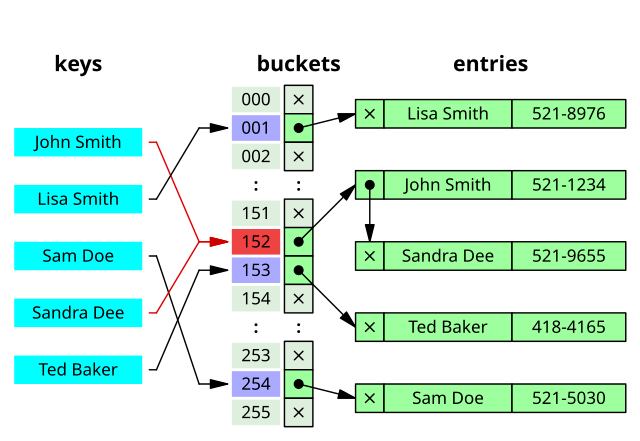

*Image extraite de [Wikipedia](https://en.wikipedia.org/wiki/Hash_table)*

<div class="alert alert-danger">

La classe `ListeDoublementChainee` est fournie dans le fichier `utils.py`. Son utilisation se fait via l’interface suivante : 

</div>

```python
class ListeChainee(ABC):
    @abstractmethod
    def est_vide(self):
        pass

    @abstractmethod
    def rechercher(self, valeur, comp=None):
        pass

    @abstractmethod
    def ajouter_debut(self, valeur):
        pass

    @abstractmethod
    def ajouter_fin(self, valeur):
        pass

    @abstractmethod
    def supprimer(self, valeur):
        """Cette méthode doit lever une exception ValueError si la clé n’est pas présente."""
        pass

    @abstractmethod
    def supprimer_fin(self):
        pass
```

In [52]:
class ListeChainee(ABC):
    @abstractmethod
    def est_vide(self):
        pass

    @abstractmethod
    def rechercher(self, valeur, comp=None):
        pass

    @abstractmethod
    def ajouter_debut(self, valeur):
        pass

    @abstractmethod
    def ajouter_fin(self, valeur):
        pass

    @abstractmethod
    def supprimer(self, valeur):
        """Cette méthode doit lever une exception ValueError si la clé n’est pas présente."""
        pass

    @abstractmethod
    def supprimer_fin(self):
        pass

<div class="alert alert-success">

Un exemple d’utilisation de la classe `ListeDoublementChainee` est donné ci-dessous, avec notamment quelques précisions sur les méthodes `rechercher` et `supprimer`. 

</div>

In [58]:
from utils import ListeDoublementChainee
import random

# Création d’une liste avec des valeurs aléatoires entre 1 et 10
L = ListeDoublementChainee()
for _ in range(10):
    L.ajouter_debut(random.randrange(1,10))
print(L)

# Suppression des cinq derniers éléments
for i in range(5):
    L.supprimer_fin()
    print(L)

# Tentative de suppression de l’élément 8 : s’il n’est pas présent, 
# la méthode supprime lève une exception de type ValueError. 
# L’argument comp est une fonction décrivant comment les maillons doivent être comparés. 
# Lors de la recherche d’une clé dans un maillon contenant un couple (cle, valeur), il faudra 
# adapter cette fonction pour préciser de rechercher sur la clé. Dans ce contexte, x représente 
# l’élément contenu dans le maillon et y l’argument des fonctions supprimer ou rechercher
try:
    L.supprimer(8,comp=lambda x,y: x==y)
    print(L)
except ValueError as v:
    print("La clé n’est pas présente, exception de type", type(v))

2 -> 4 -> 1 -> 3 -> 7 -> 5 -> 3 -> 3 -> 8 -> 2
2 -> 4 -> 1 -> 3 -> 7 -> 5 -> 3 -> 3 -> 8
2 -> 4 -> 1 -> 3 -> 7 -> 5 -> 3 -> 3
2 -> 4 -> 1 -> 3 -> 7 -> 5 -> 3
2 -> 4 -> 1 -> 3 -> 7 -> 5
2 -> 4 -> 1 -> 3 -> 7
La clé n’est pas présente, exception de type <class 'ValueError'>


<div class="alert alert-info">

1. Donner l’implémentation de la classe `TableChainee` en utilisant la classe `ListeDoublementChainee` fournie dans l’énoncé. 

</div>

In [59]:
class TableChainee(MonDictionnaireImplemente):
    def __init__(self,hachage = hash , alveoles = 4):
        
        self.__table = [ ListeDoublementChainee() for _ in range(alveoles)]  
        
        # for "_" fonctionne comme pour un for i in range n'importe quelle valeur
        
        self.__alveoles = alveoles
        self.__hachage = hachage
        
        
    def rechercher(self, cle):
        h = self.__hachage(cle) % self.alveoles
        return self.__table[h].rechercher(cle,comp = lambda x , y : x[0] == y )       #comp pour comparer l'égalité 

    def inserer(self, cle, valeur):
        h = self.__hachage(cle) % self.__alevoles
        self.table[h].ajouter_debut((cle,valeur))
        
    def supprimer(self, cle):
        h = self.__hachage(cle) % self.__alveoles
        try: 
            self.table[h].supprimer(cle)
            
        except ValueError : 
            print("la cle n'existe pas" )
        

In [60]:
mon_dictionnaire = TableChainee()

mon_dictionnaire.inserer("macle", "mavaleur")
mon_dictionnaire.inserer("monautrecle", "monautrevaleur")

if mon_dictionnaire.rechercher("macle"):
    print("Clé présente")
else:
    print("Clé absente")

AttributeError: 'TableChainee' object has no attribute '_TableChainee__alevoles'

<div class="alert alert-success">

Il est bien sûr possible d’utiliser des `list()` de `Python`. Cela dit, comme des insertions et des suppressions sont a priori souvent réalisées sur des dictionnaires, il est préférable d’utiliser une liste doublement chaînée qui gère ces opérations de manière plus efficace. 

</div>

### L’adressage ouvert

Le principe de l’adressage ouvert est de ne placer qu’une clé par alvéole et d’appliquer une **stratégie** lorsque deux clés sont hachées dans la même alvéole. 
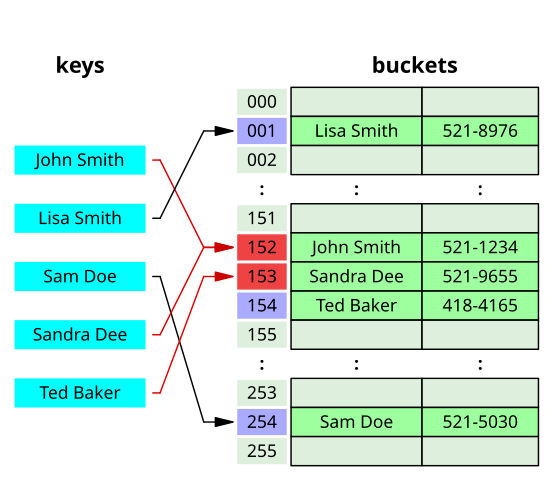

_Image extraite de [Wikipedia](https://en.wikipedia.org/wiki/Hash_table)_

Plusieurs stratégies sont envisageables, parmi lesquelles : 

+ _linéaire_ : si l’alvéole est déjà occupée, la clé sera hachée dans la prochaine alvéole disponible dans la table 
+ _quadratique_ : l’intervalle entre les alvéoles augmente linéairement : 
$$
h_i(c) = \big ( h(c) + (-1)^{i+1} \cdot \Big \lceil{\frac{i}{2}} \Big \rceil^2 \big ) \mod{m}        
$$
où $m$ est le nombre d’alvéoles
+ _double hachage_ : l’indice est donné par une seconde fonction de hachage

In [ ]:
class AdressageOuvert(MonDictionnaire):
    def rechercher(self, cle):
        pass

    def inserer(self, cle, valeur):
        pass

    def supprimer(self, cle):
        pass

In [ ]:
mon_dictionnaire = AdressageOuvert()

mon_dictionnaire.inserer("macle", "mavaleur")
mon_dictionnaire.inserer("monautrecle", "monautrevaleur")

if mon_dictionnaire.rechercher("macle"):
    print("Clé présente")
else:
    print("Clé absente")

<div class="alert alert-warning">

Contrairement à la version utilisant des listes chaînées, il peut devenir impossible d’ajouter une clé dans une table à adressage ouvert, lorsque toutes les alvéoles sont occupées. Pour éviter cela, la classe peut maintenir le **facteur de remplissage**, simplement défini comme le nombre d’alvéoles occupées $n$ sur le nombre total d’alvéoles $m$. Lorsque ce dernier est égal à $1$, il n’est plus possible d’insérer de nouvelles clés dans la table. Une redimension est donc nécessaire : il est important de penser à hacher _toutes_ les clés présentes dans cette nouvelle table, étant donné que l’opération `modulo m` sera différente.

</div>

### Surcharge d’opérateurs

Afin de simplifier l’utilisation de notre tableau associatif, on souhaiterait permettre l’utilisation des syntaxes suivantes : 

In [ ]:
mon_dictionnaire = AdressageOuvert()

mon_dictionnaire["macle"] = "mavaleur"
mon_dictionnaire["monautrecle"] = "monautrevaleur"

if "macle" in mon_dictionnaire:
    print("Clé présente")
else:
    print("Clé absente")

del mon_dictionnaire["macle"]

if "macle" in mon_dictionnaire:
    print("Clé présente")
else:
    print("Clé absente")

Pour cela, nous allons réutiliser les méthodes précédentes pour **surcharger** les méthodes `inserer`, `rechercher` et `supprimer` en utilisant les méthodes `__getitem__`, `__setitem__`, `__contains__` et consorts, déjà croisées sur d’autres TPs. 

In [ ]:
from abc import ABC, abstractmethod

# ABC signifie que la classe MonDictionnaire est abstraite : 
# il ne sera pas possible de créer d’objets de cette classe. 
# Et c’est normal : un dictionnaire peut être implémenté avec un tableau, 
# une liste chaînée, un arbre binaire de recherche… Et l’implémentation est 
# pour l’instant abstraite !
class MonDictionnaire(ABC):
    @abstractmethod
    def __getitem__(self, cle):
        pass

    @abstractmethod
    def __setitem__(self, cle):
        pass

    @abstractmethod
    def __contains__(self):
        pass

    @abstractmethod
    def __delitem__(self):
        pass

<div class="alert alert-info">

1. Modifier une des classes précédentes (`TableChainage` ou `AdressageOuvert`) pour permettre la surcharge d’opérateurs. Il est possible de réutiliser les méthodes définies précédemment en les ajoutant dans la classe implémentant `MonDictionnaire`. La visibilité de ces méthodes pourra éventuellement être privée (le nom doit être précédé d’un `__`).

</div>

### Rendre la table itérable

Une dernière syntaxe qu’il est très pratique de pouvoir utiliser est celle qui permet d’itérer les éléments d’un dictionnaire (bien souvent via les clés) : 

```python
for cle in mon_dictionnaire:
    print(mon_dictionnaire[cle])
```

Cette syntaxe est rendue possible via la surcharge de la méthode `__iter__`, qui nécessite de créer un **itérateur** sur le type d’objets sur lequel on souhaite itérer. Pour que cela fonctionne simplement, nous allons utiliser deux méthodes : 

- `iter(liste)` qui retourne un itérateur sur un objet de la classe `list()`
- la surcharge de la méthode `__iter__` qui est fournie dans la classe `ListeDoublementChainee`

<div class="alert alert-info">

1. Écrire une surcharge de la méthode `__iter__` qui retournera un itérateur sur la liste des clés présentes dans la table. Pour obtenir la liste des clés présentes dans une liste chaînée `lc`, la syntaxe suivante est proposée :

```python
# Création d’un objet itérable à partir de la liste 
it_lc = iter(lc)
# Itération sur les maillons tant que possible
while(True):
    try:
        # La fonction next permet d’obtenir l’itérateur suivant
        cle, valeur = next(it)
    except StopIteration:
        # La méthode next lève l’exception StopIteration lorsque la liste 
        # n’a plus d’éléments à parcourir
        break
```

</div>

In [ ]:
from abc import ABC, abstractmethod

# ABC signifie que la classe MonDictionnaire est abstraite : 
# il ne sera pas possible de créer d’objets de cette classe. 
# Et c’est normal : un dictionnaire peut être implémenté avec un tableau, 
# une liste chaînée, un arbre binaire de recherche… Et l’implémentation est 
# pour l’instant abstraite !
class MonDictionnaire(ABC):
    @abstractmethod
    def __getitem__(self, cle):
        pass

    @abstractmethod
    def __setitem__(self, cle):
        pass

    @abstractmethod
    def __contains__(self):
        pass

    @abstractmethod
    def __delitem__(self):
        pass

In [ ]:
mon_dictionnaire = MonDictionnaire()

mon_dictionnaire["macle"] = "mavaleur"
mon_dictionnaire["monautrecle"] = "monautrevaleur"

for cle in mon_dictionnaire:
    print(mon_dictionnaire[cle])

## Aller plus loin

+ Certains langages de programmation proposent des implémentations des tableaux associatifs via des arbres binaires de recherche avec des propriétés supplémentaires, appelés [arbres bicolores](https://fr.wikipedia.org/wiki/Arbre_bicolore).
+ Approfondir les fonctions de hachage et les stratégies de résolution de collision peut également être intéressant pour la compréhension et l’implémentation des tables de hachage : voir par exemple le [hachage universel](https://fr.wikipedia.org/wiki/Hachage_universel), le [hachage statique](https://en.wikipedia.org/wiki/Static_hashing) ou le [hachage parfait dynamique](https://en.wikipedia.org/wiki/Dynamic_perfect_hashing).